# Лабораторная работа №2

Работу выполнила студентка группы 9383, Карпекина Анна.

### Список задач:

1. Используя ДПФ построить траекторию основного фона (F0) на записи своего голоса.  
2. Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.  
3. Постороить сонограмму по записи своего голоса.  

In [226]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io
import matplotlib.pyplot as plt
import more_itertools as mi
from scipy import signal as data
import numpy as np
from scipy import hamming

In [227]:
data_dir = pjoin(dirname(scipy.io.__file__), './') #считываем аудиофайл
wav_fname = pjoin(data_dir, 'voicem.wav')
samplerate, data = wavfile.read(wav_fname)
lenOfSignal = data.shape[0] / samplerate
time = np.linspace(0, lenOfSignal, data.shape[0])

<ipython-input-228-a1ce56052e7a>:9: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



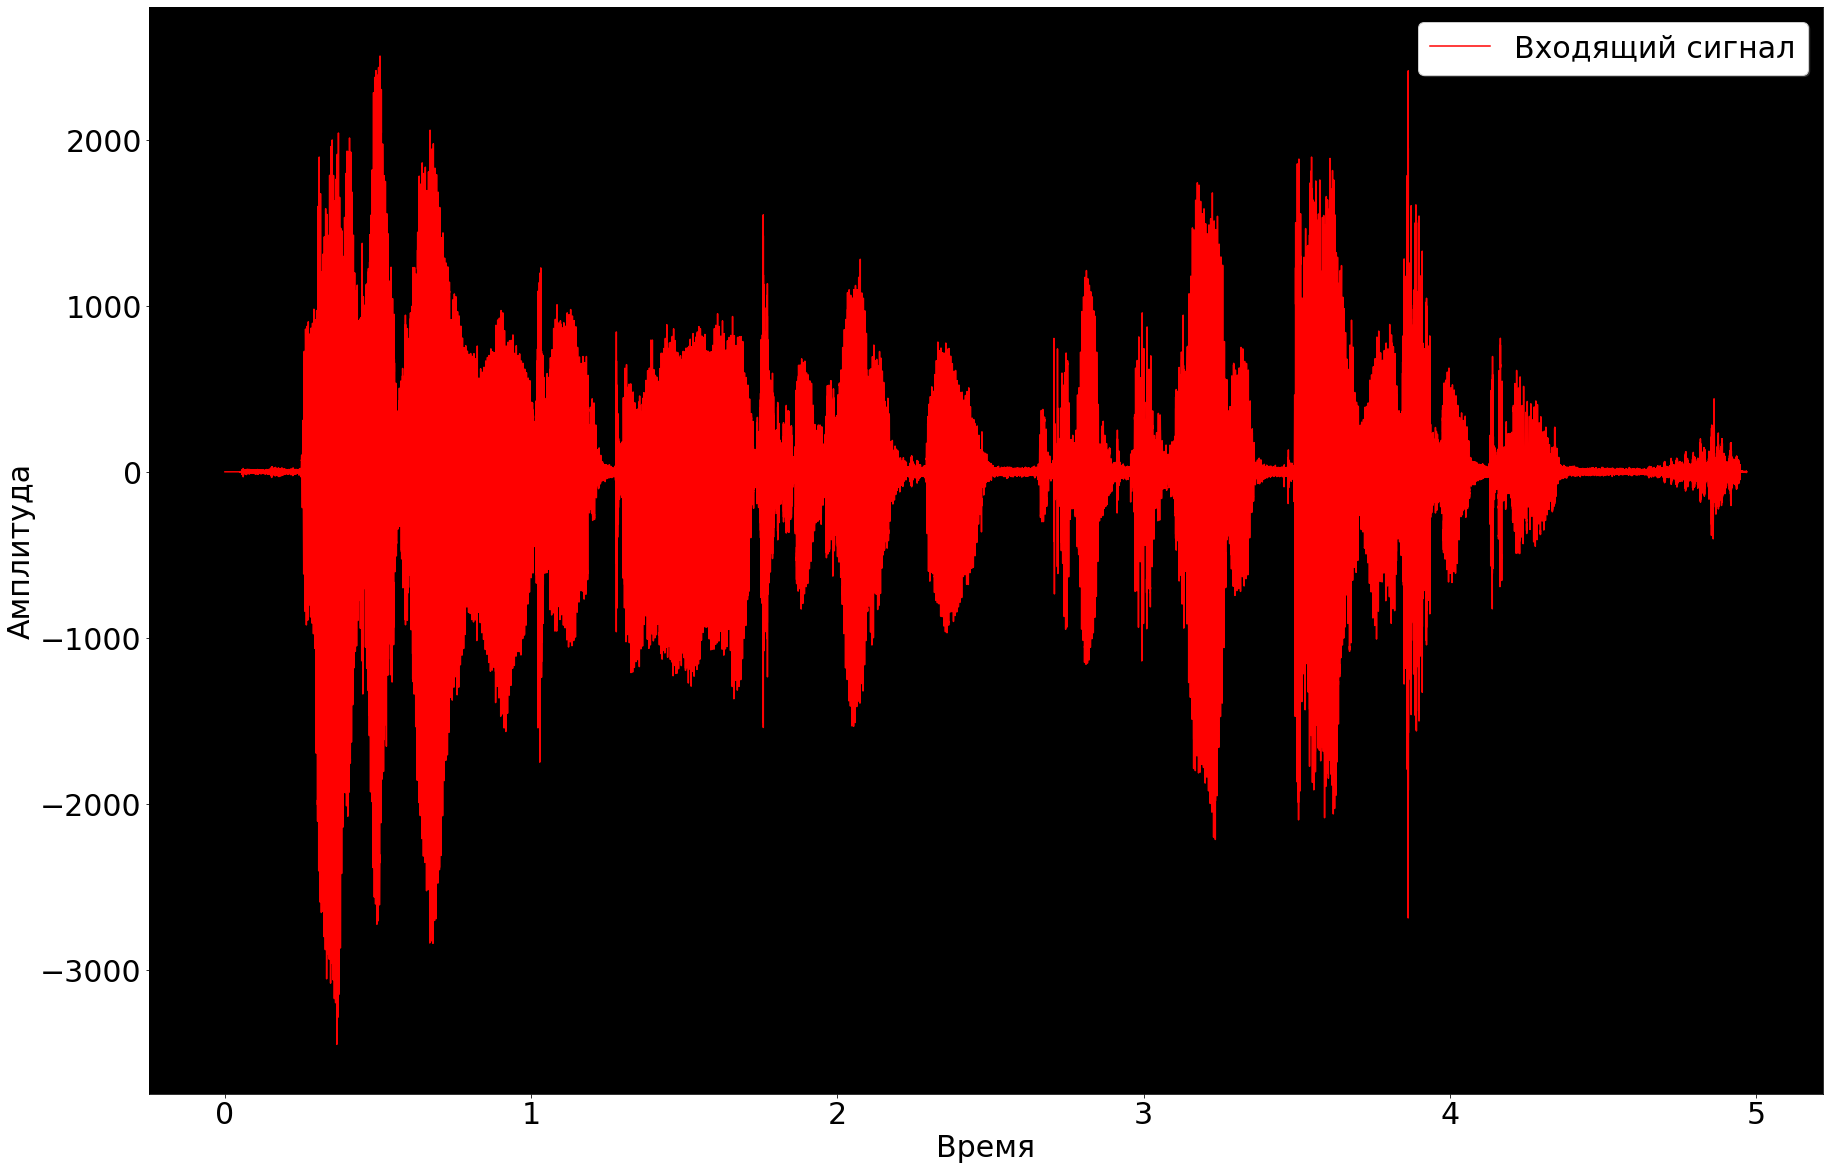

In [228]:
plt.rcParams['font.size'] = '30'      
fig = plt.figure('Voice') 
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(time, data, color='r', label = 'Входящий сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend(shadow =  True, facecolor = 'w')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Используя ДПФ построить траекторию основного фона (F0) на записи своего голоса.

In [229]:
N = 256
ranges = list(mi.windowed(data,n = N, step = int(N/4)))
ranges[-1] = [i for i in ranges[-1] if i]
for i in range(len(ranges)):
    ranges[i] = ranges[i] * np.hamming(len(ranges[i]))

In [230]:
def DFT(x):
    L = len(x)
    n = np.arange(L)
    k = n.reshape(L, 1)
    exp = np.exp(-2j * np.pi * k * n / L)
    return np.dot(exp, x)

In [231]:
dft_ranges = []
for i in ranges:
    dft_ranges.append(DFT(i))

In [232]:
amp_s = [(sum([j**2 for j in i[:int(len(i)/2)]])**0.5).real for i in dft_ranges]

In [233]:
f = []
for i in range(0, len(amp_s), int(samplerate/N)):
    f.append(np.array(amp_s[i:i + int(samplerate/N)]))

In [234]:
F0 = []
for i in f:
    if i.max() > 2*i.mean():
        F0 += (i.tolist())
    else:
        F0 += np.zeros(len(i)).tolist()

<ipython-input-235-7b9e9c87f8bc>:8: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



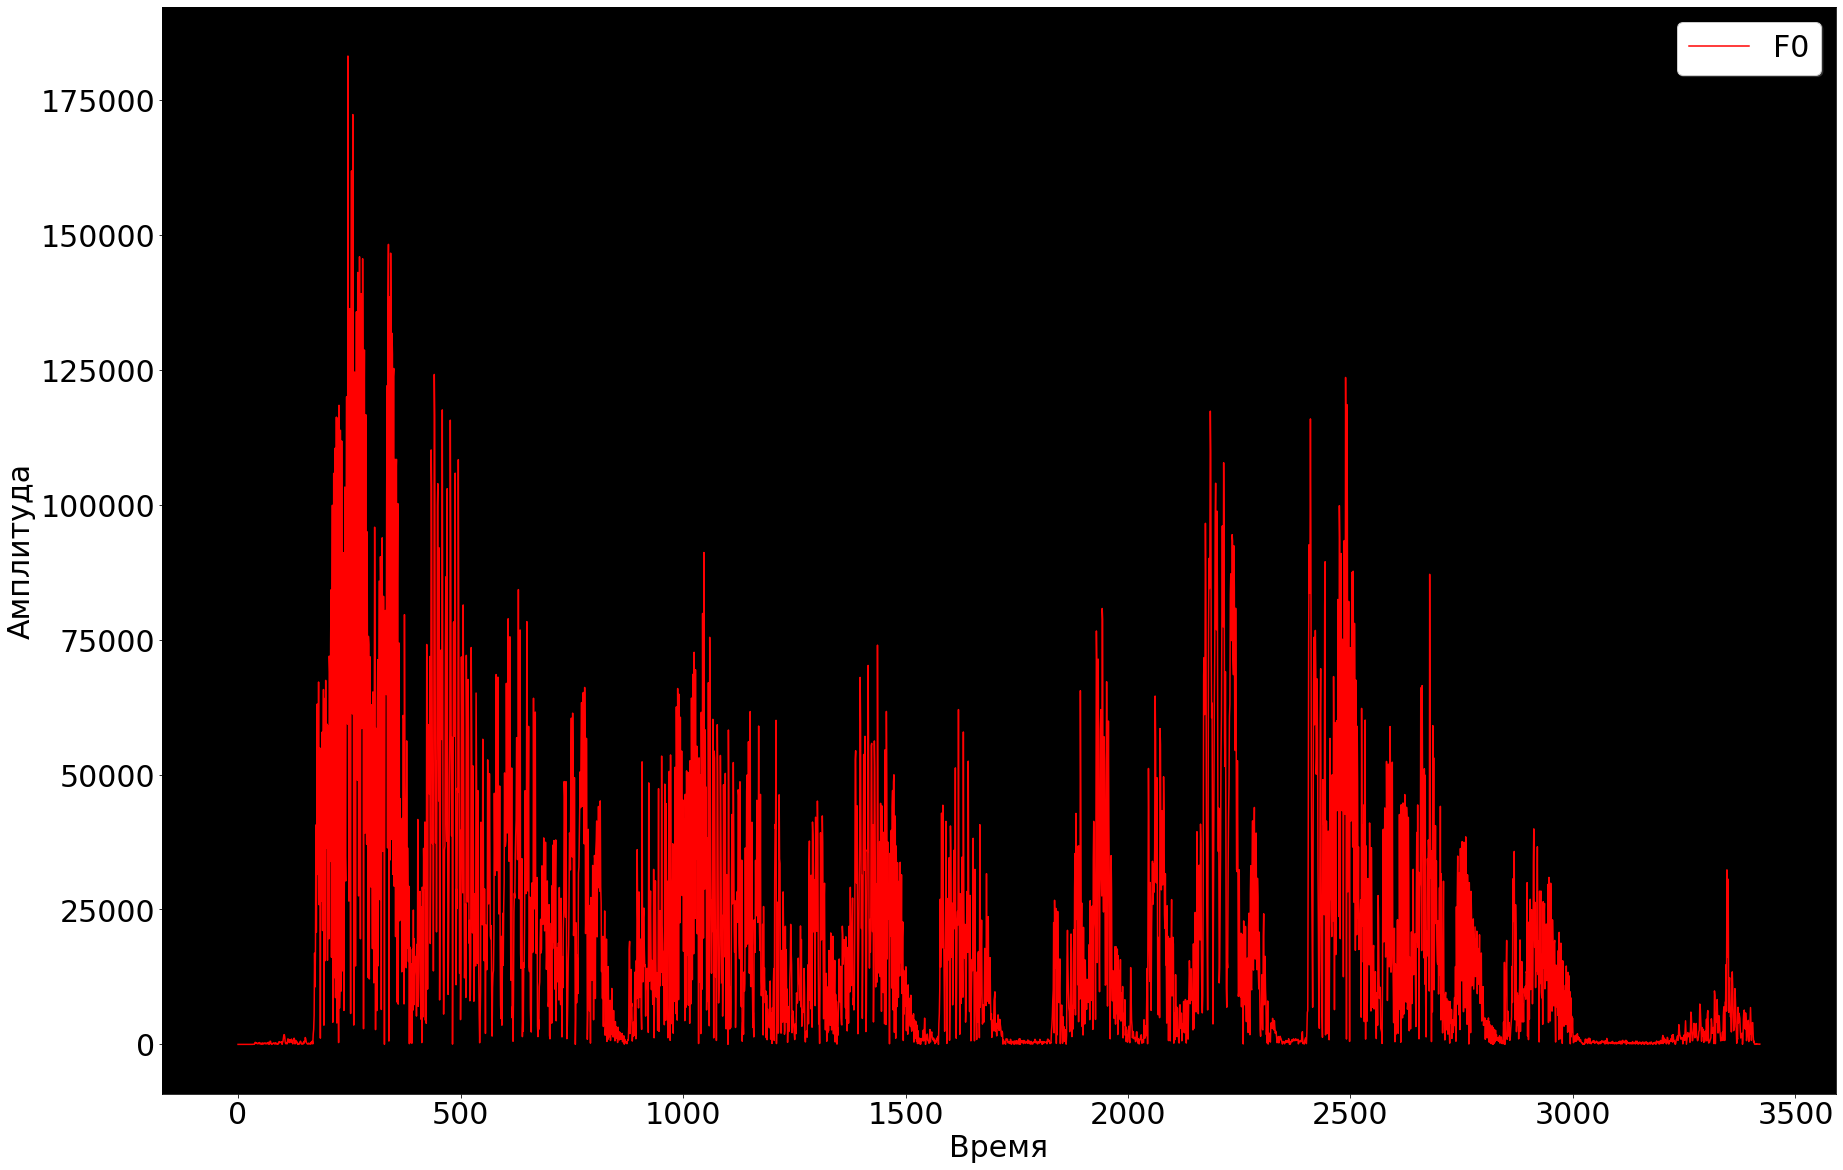

In [235]:
fig = plt.figure('F0')
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(F0, color='r', label = 'F0')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.legend(shadow =  True, facecolor = 'w')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Используя ДПФ построить траектории второй, третьей и четвертой формантных частот на записи своего голоса.

In [236]:
def Formant_frequency(n, F0):
    res = []
    if(F0[0] > n * max(F0[0], F0[1])):
        res += [max(F0[0], F0[1])]
    else:
        res += [0]
    for j in range(1, int(len(F0) / n)):
        m = max([F0[n * j], F0[n * j + 1], F0[n * j - 1]])
        if(F0[j] > n * m):
            res += [m]
        else:
            res += [0]
    return res

In [237]:
F2 = Formant_frequency(2, F0)
F3 = Formant_frequency(3, F0)
F4 = Formant_frequency(4, F0)

<ipython-input-238-9c929ad691aa>:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



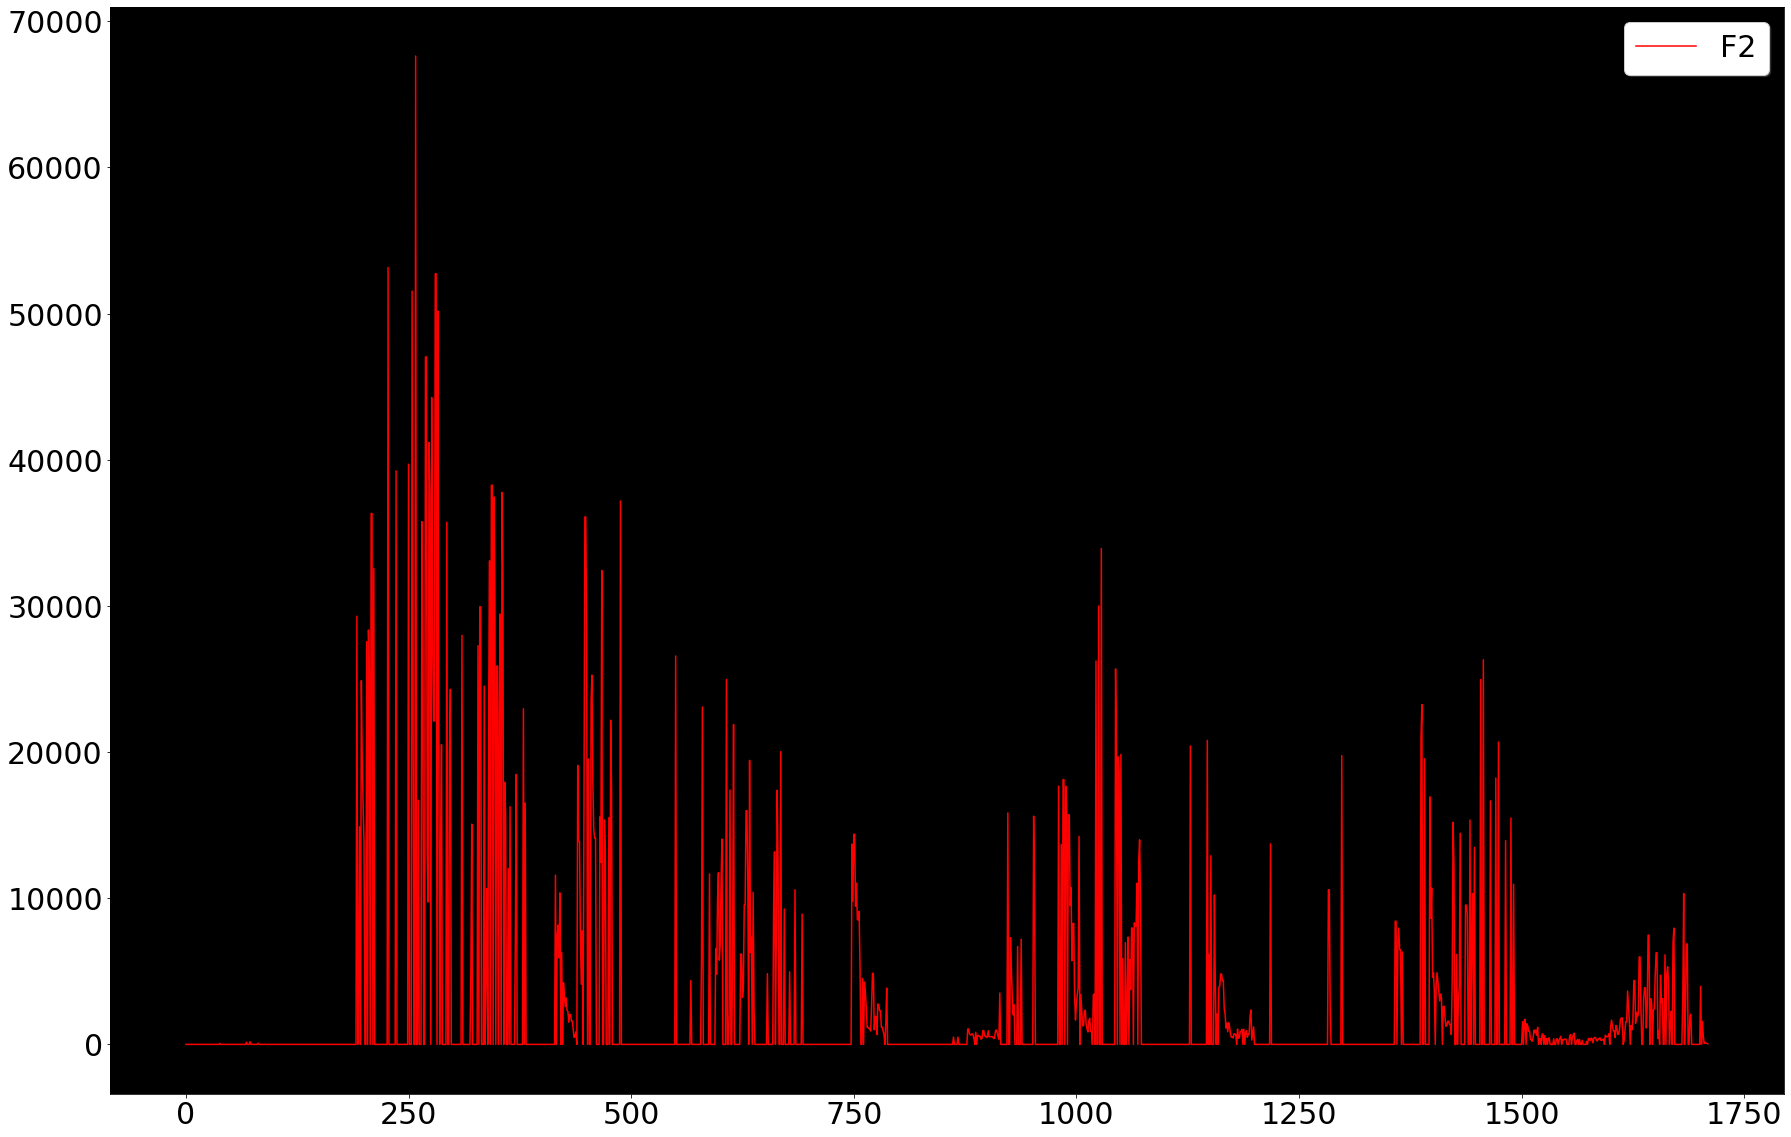

In [238]:
fig = plt.figure('Вторая формантная частота')
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(F2, color='r', label = 'F2')
plt.legend(shadow =  True, facecolor = 'w')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

<ipython-input-239-61bb99e058a5>:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



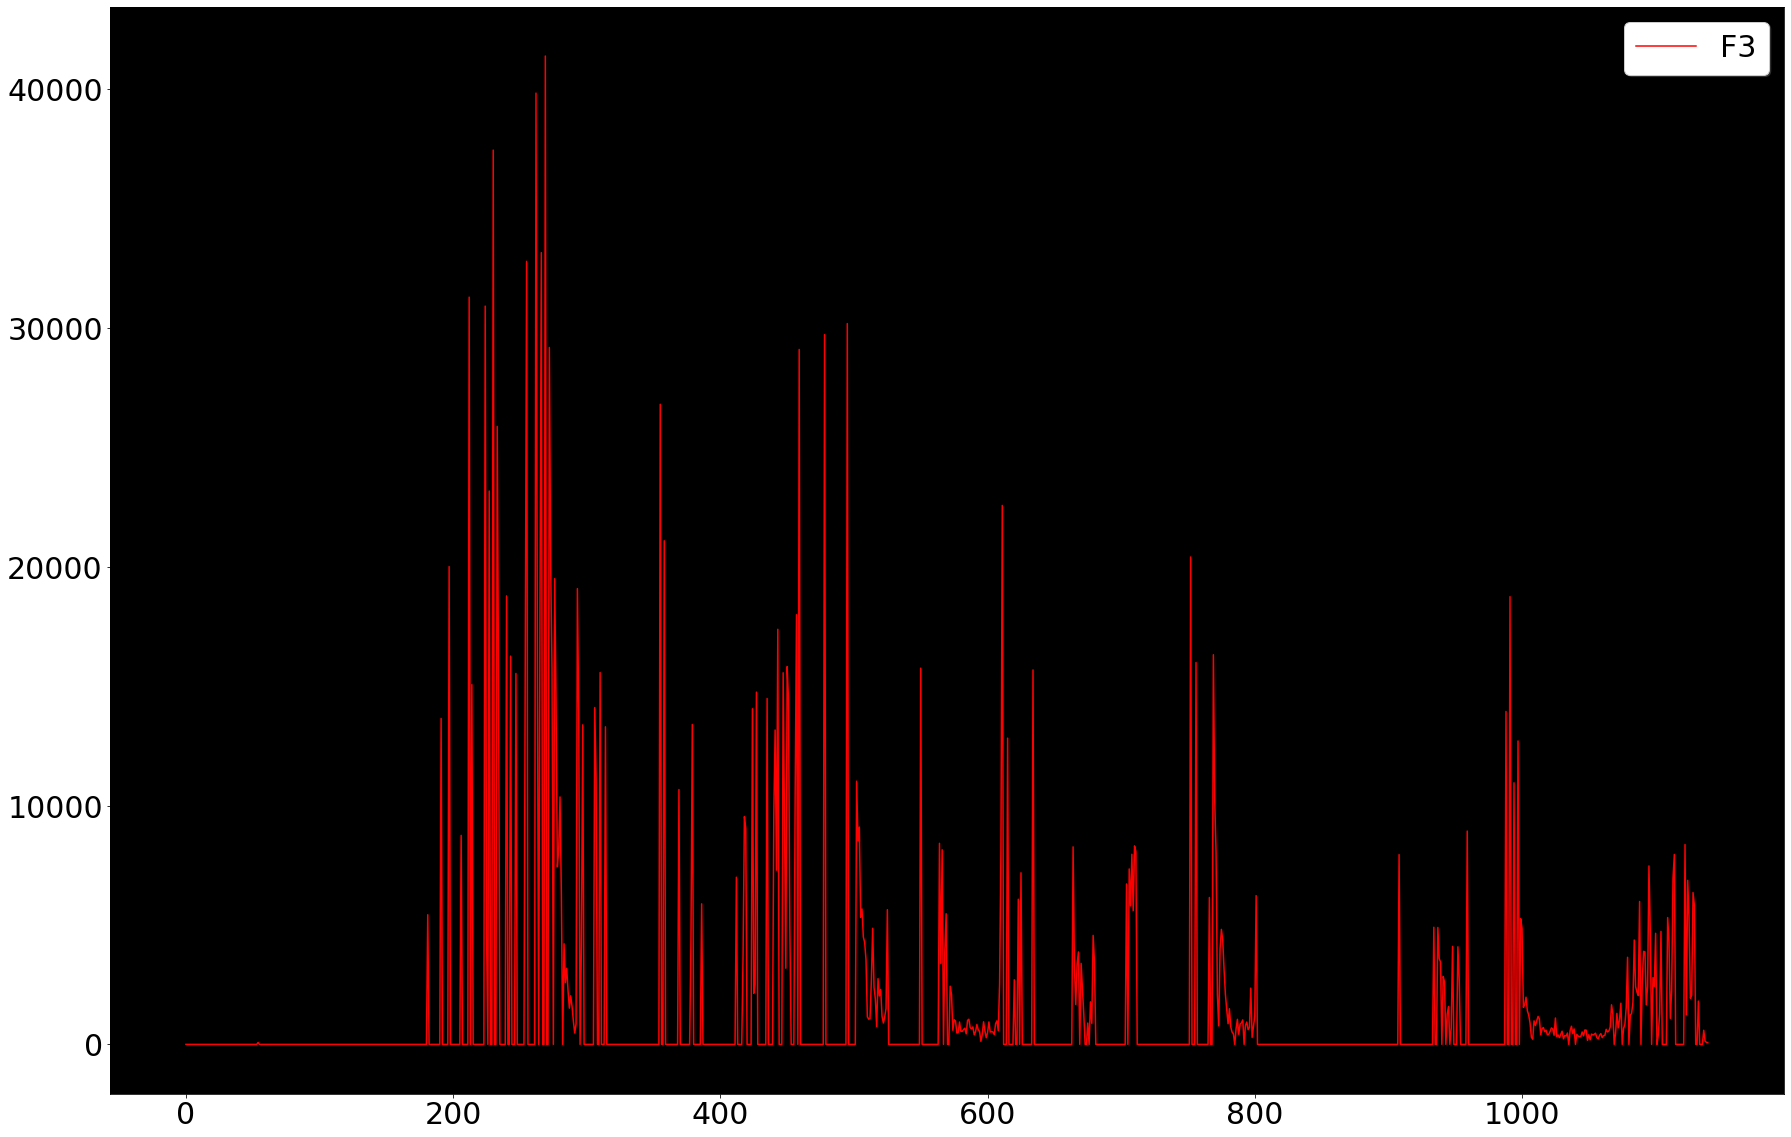

In [239]:
fig = plt.figure('Третья формантная частота')
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(F3, color='r', label = 'F3')
plt.legend(shadow =  True, facecolor = 'w')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

<ipython-input-240-400a2871c9a9>:6: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



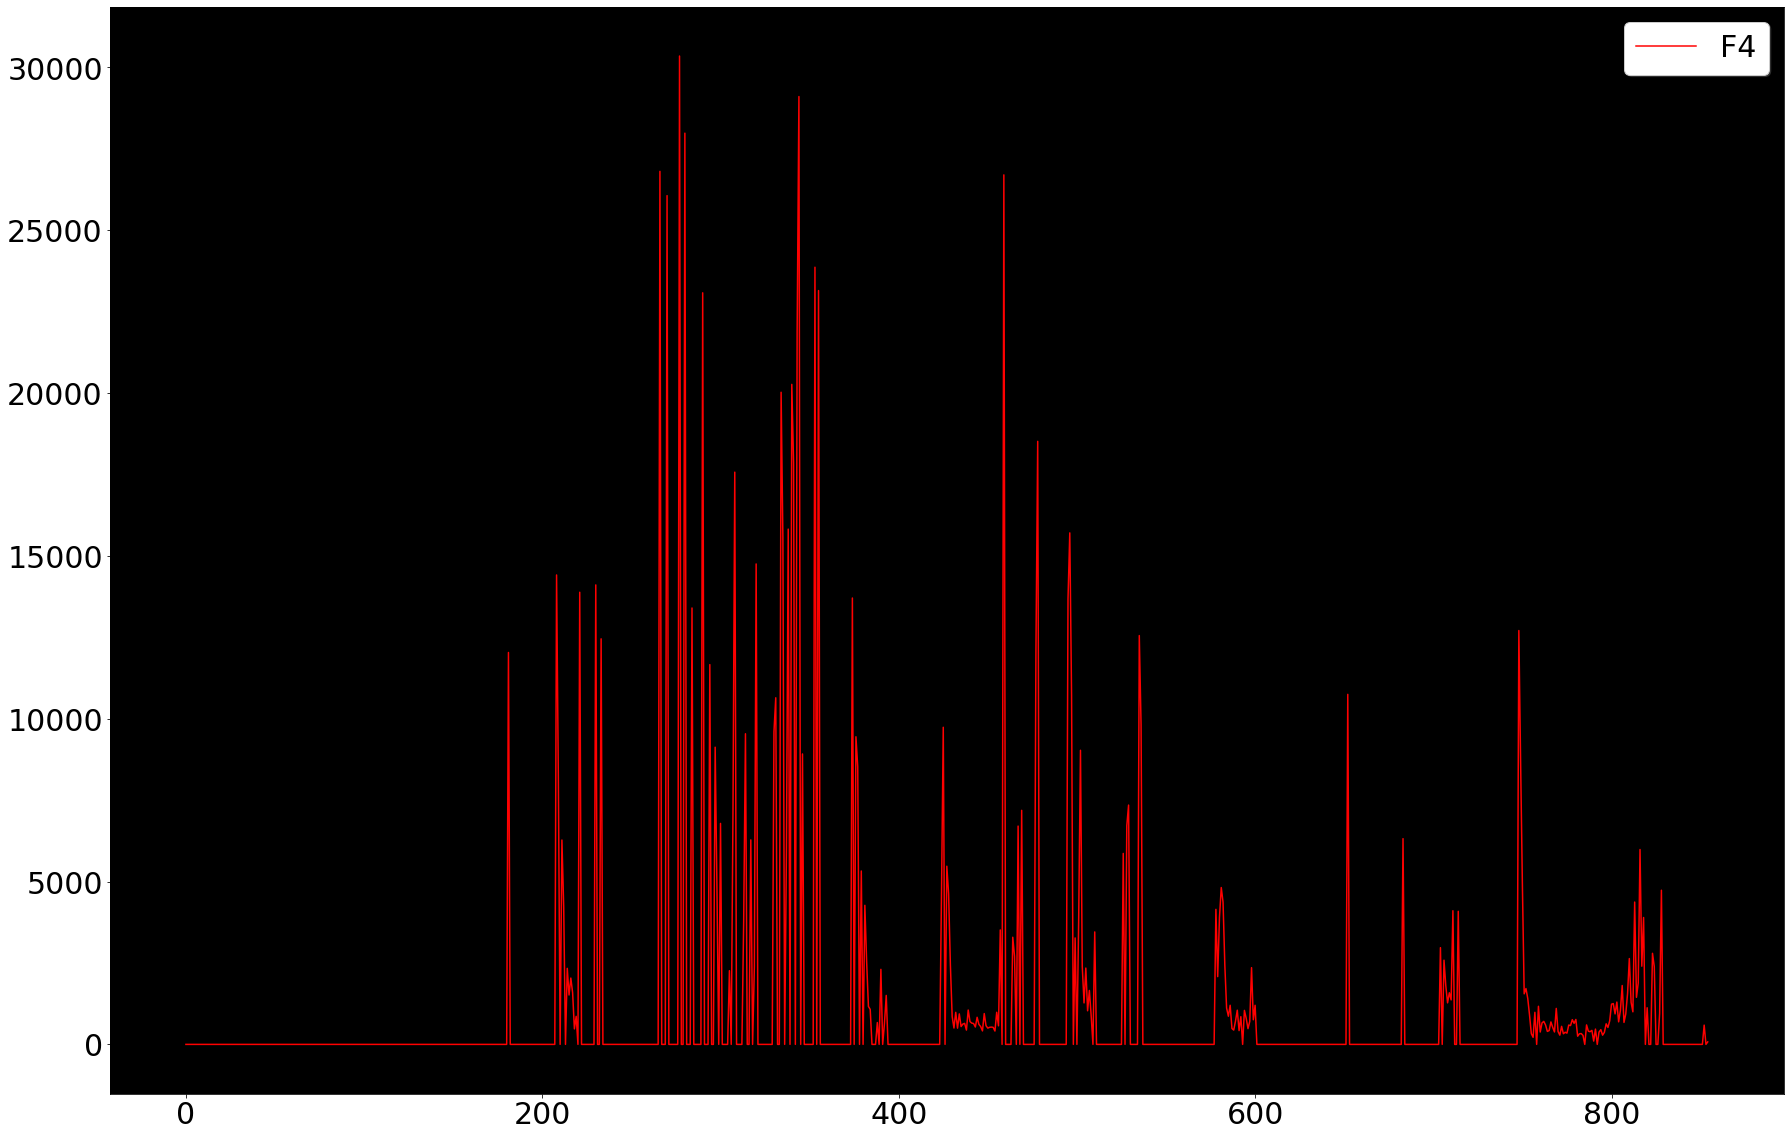

In [240]:
fig = plt.figure('Четвертая формантная частота')
fig.set_figwidth(30)
fig.set_figheight(20)
plt.plot(F4, color='r', label = 'F4')
plt.legend(shadow =  True, facecolor = 'w')
ax = plt.axes()
ax.set(facecolor = 'black')
plt.show()

## Постороить сонограмму по записи своего голоса.

In [250]:
import plotly.express as px
ranges = list(mi.windowed(amp_s, n=round(samplerate/N), step=round(samplerate/N)))
ranges[-1] = [i for i in ranges[-1] if i]
for i in ranges:
    for j in range(len(i)):
        if i[j] > 5e6:
            i[j] = 0
result = np.array(ranges[:-1], dtype=float)
fig = px.imshow(result, color_continuous_scale='matter_r', origin='lower')
fig.show()

### Вывод

В ходе выполнения работы было изучено дискретное преобразования Фурье, а также были написаны функции для анализа собственного голоса.
